## 1. Get the data

Number of Instances:
442

Number of Attributes:
First 10 columns are numeric predictive values

Target:
Column 11 is a quantitative measure of disease progression one year after baseline

Attribute Information:

age age in years

sex

bmi body mass index

bp average blood pressure

s1 tc, total serum cholesterol

s2 ldl, low-density lipoproteins

s3 hdl, high-density lipoproteins

s4 tch, total cholesterol / HDL

s5 ltg, possibly log of serum triglycerides level

s6 glu, blood sugar level

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# load data
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True, as_frame=True,scaled=False)

# convert to dataframe
data = pd.DataFrame(diabetes_X)
data



,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0
...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0


## 2. Frame the problem
To build a predictive model to identify the key factors that influence the rate of diabetes progression over time

## 3. EDA 
- Describe the data, explore it, and provide insights about it. This should include at least:

**statistics, scatter plots histograms, a correlation matrix, and concise and relevant insights**

              age         sex         bmi          bp          s1          s2  \
count  442.000000  442.000000  442.000000  442.000000  442.000000  442.000000   
mean    48.518100    1.468326   26.375792   94.647014  189.140271  115.439140   
std     13.109028    0.499561    4.418122   13.831283   34.608052   30.413081   
min     19.000000    1.000000   18.000000   62.000000   97.000000   41.600000   
25%     38.250000    1.000000   23.200000   84.000000  164.250000   96.050000   
50%     50.000000    1.000000   25.700000   93.000000  186.000000  113.000000   
75%     59.000000    2.000000   29.275000  105.000000  209.750000  134.500000   
max     79.000000    2.000000   42.200000  133.000000  301.000000  242.400000   

               s3          s4          s5          s6      target  
count  442.000000  442.000000  442.000000  442.000000  442.000000  
mean    49.788462    4.070249    4.641411   91.260181  152.133484  
std     12.934202    1.290450    0.522391   11.496335   77.093005 

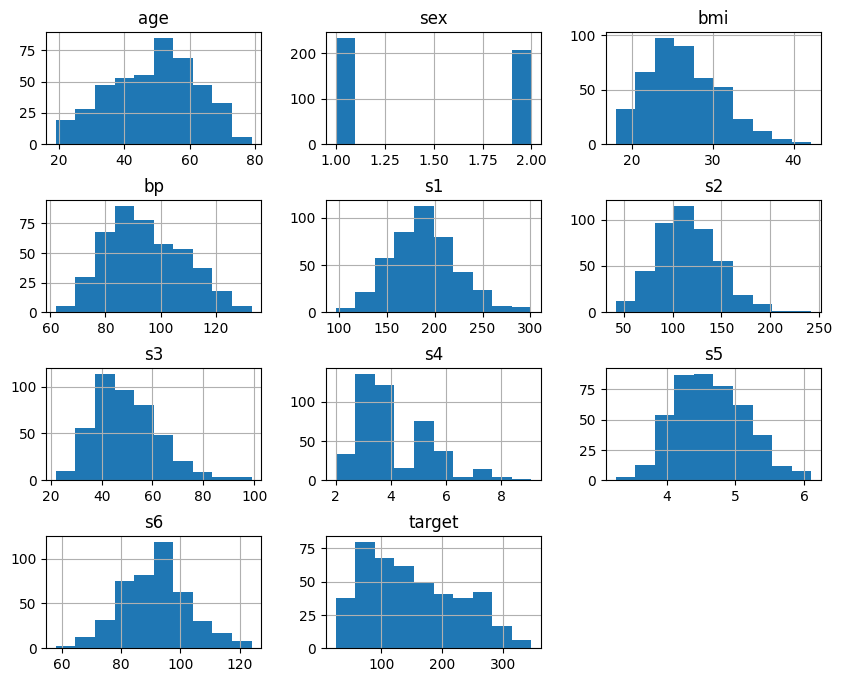

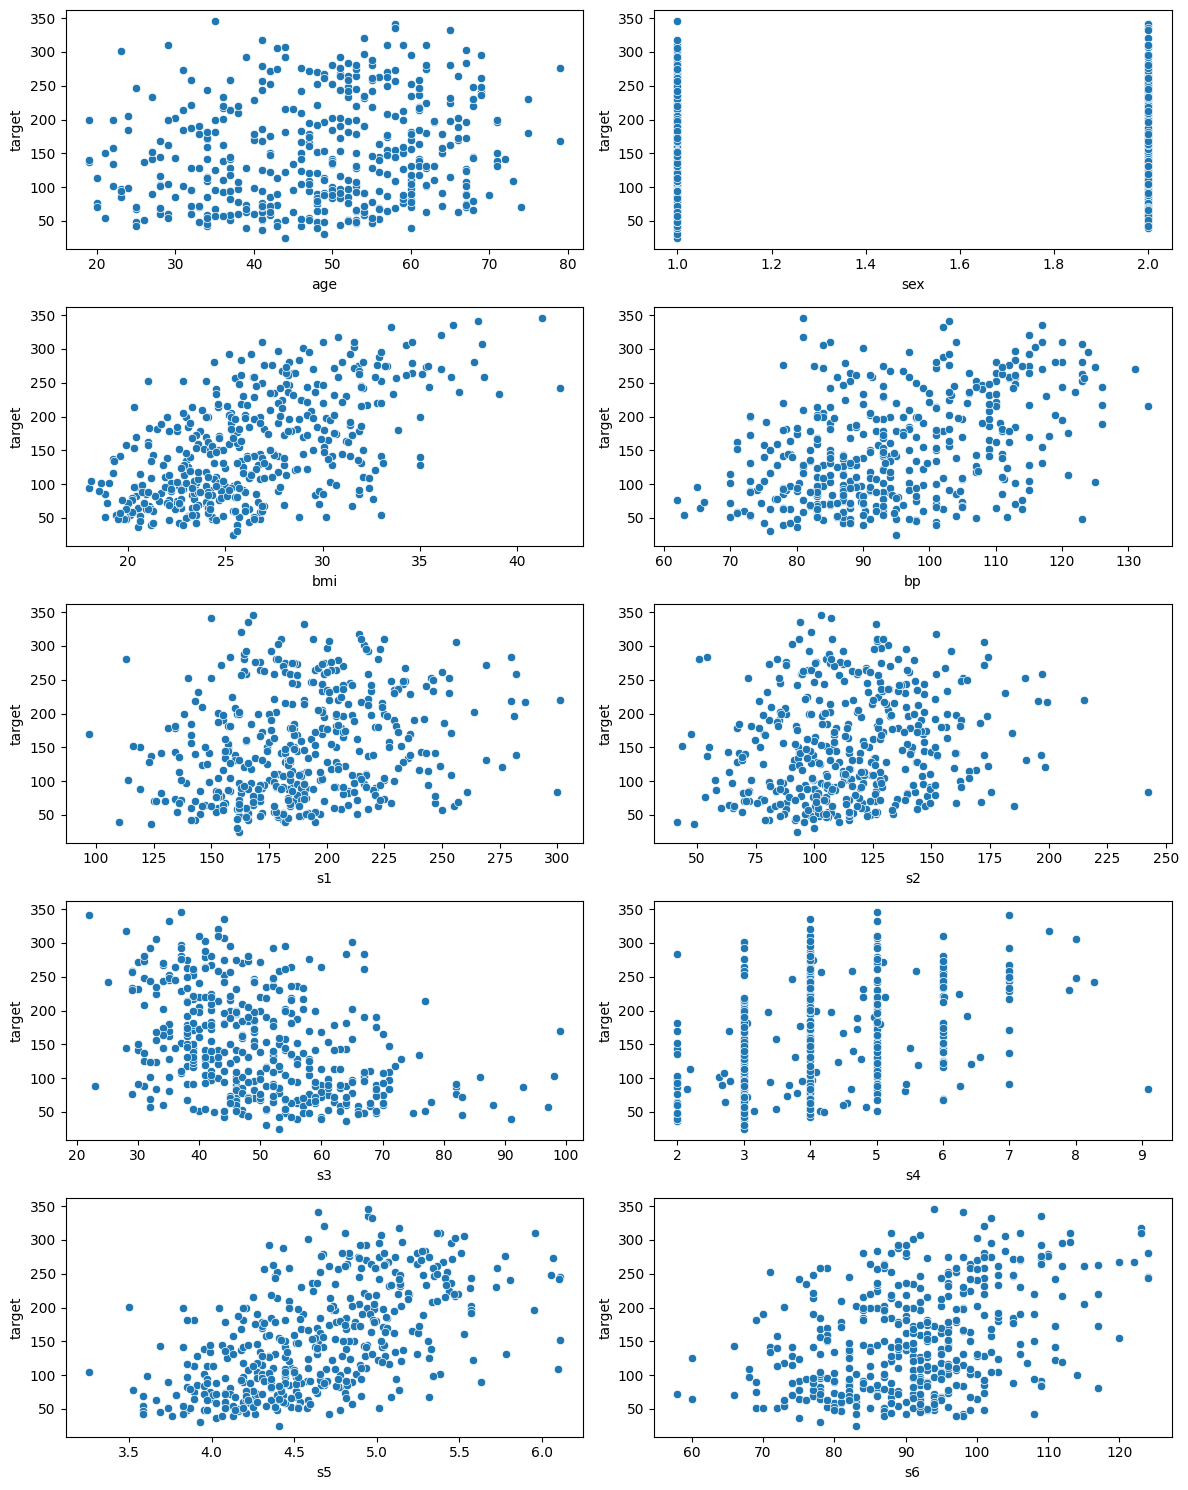

             age       sex       bmi        bp        s1        s2        s3  \
age     1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
sex     0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
bmi     0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
bp      0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
s1      0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
s2      0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
s3     -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
s4      0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
s5      0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
s6      0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
target  0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

              s4        s5        s6   

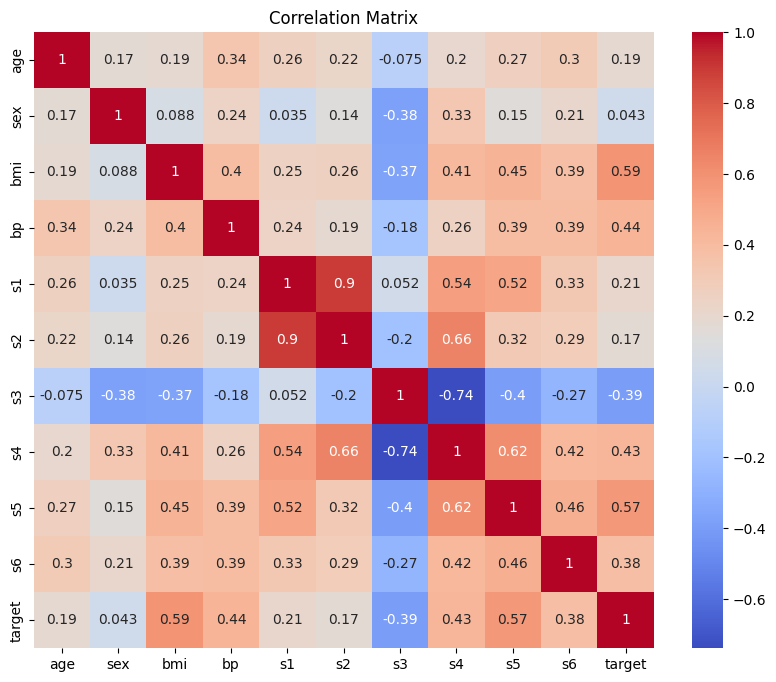

In [2]:
# check data type
#print(data.dtypes)

# check null value
#print(data.isnull().sum())

data['target'] = diabetes_y

# describe
print(data.describe())
print(data.head(10))
# histogram
data.hist(figsize=(10, 8))
plt.subplots_adjust(hspace=0.5)
plt.show()

# 
# column
columns_to_plot = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

# 5*2
fig, axes = plt.subplots(5, 2, figsize=(12, 15))  

# loop
index = 0
for i in range(5):
    for j in range(2):
        if index < len(columns_to_plot):
            sns.scatterplot(data=data, x=columns_to_plot[index], y='target', ax=axes[i, j])
            index += 1
plt.tight_layout()  
plt.show()

#correlation matrix
corr_matrix = data.corr()
print(corr_matrix)

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



## Insights
 Features with higher correlation with the target variable (in descending order of correlation):

- bmi (0.586450)
- s5 (0.565883)
- bp (0.441482)
- s4 (0.430453)
- s6 (0.382483)

High correlation between features:

s1 and s2 are highly correlated (0.896663)

s3 and s4 are highly negatively correlated (-0.738493)

s4 and s5 are highly correlated (0.617859)

Strong correlations between features like BMI, BP, S1, S2, S4, and S5 with the target variable, these features should be given higher priority during feature selection. S3 shows a negative correlation with the target variable.

## 4. Clean the data if needed, and explain your reasoning for your reader 




In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Load data
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True, as_frame=True, scaled=False)

# Convert to dataframe
data = pd.DataFrame(diabetes_X)
data['target'] = diabetes_y

# Check for missing values
print("Missing values:")
print(data.isnull().sum())

# Check for duplicates
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Function to detect outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Print number of outliers for each feature
print("\nNumber of outliers before removal:")
for column in data.columns:
    outliers = detect_outliers(data, column)
    print(f"Number of outliers in {column}: {len(outliers)}")



Missing values:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

Number of duplicate rows: 0

Number of outliers before removal:
Number of outliers in age: 0
Number of outliers in sex: 0
Number of outliers in bmi: 3
Number of outliers in bp: 0
Number of outliers in s1: 8
Number of outliers in s2: 7
Number of outliers in s3: 7
Number of outliers in s4: 2
Number of outliers in s5: 4
Number of outliers in s6: 9
Number of outliers in target: 0


**There is no missing value and duplicate data in the dataset. There are small number of outliers in each feature, I will not remove them since they may be important data. This is a medical dataset, it is important to keep all data.**

## 5. Split the dataset to a train (75%) and validation set (10%), and test set (15%).


In [4]:
from sklearn.model_selection import train_test_split

# split x_temp,x_test, test should be 15% of dataset
X_temp, X_test, y_temp, y_test = train_test_split(
    diabetes_X, 
    diabetes_y,
    test_size=0.15,    # 15% 
    random_state=42    
)

# then split temp data into train(75%/85% ≈ 88.2%)and validate(10%/85% ≈ 11.8%)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp,
    y_temp,
    test_size=0.118,   # 10% / 85% ≈ 0.118
    random_state=42
)

# 
print(f"train: {len(X_train)} ({len(X_train)/len(diabetes_X):.1%})")
print(f"validation: {len(X_val)} ({len(X_val)/len(diabetes_X):.1%})")
print(f"test: {len(X_test)} ({len(X_test)/len(diabetes_X):.1%})")

train: 330 (74.7%)
validation: 45 (10.2%)
test: 67 (15.2%)


## Part 2
**6. Models: a univariate polynomial regression on the BMI feature versus the "disease progression one year after baseline" - from degree 0 to 5 (6 models) (1.5 point)**


**7. Compare the models using the training and validation data. Construct a table summarizing the train validation results. Each model should have a separate row in the table (3 points):**

Summary of Model Performance Metrics:
 Degree  Train R²  Val R²  Train MAE  Val MAE  Train MAPE  Val MAPE
      0    0.0000 -0.0000    66.5482  63.4475     63.3521   58.7933
      1    0.3542  0.4493    52.2781  41.9976     48.4624   40.4450
      2    0.3548  0.4492    52.2673  41.7577     48.4479   40.3099
      3    0.3550  0.4473    52.2234  41.7410     48.3564   40.2590
      4    0.3580  0.4491    51.9444  41.9528     47.9635   40.2406
      5    0.3589  0.4535    51.8138  42.0834     47.8315   40.3405


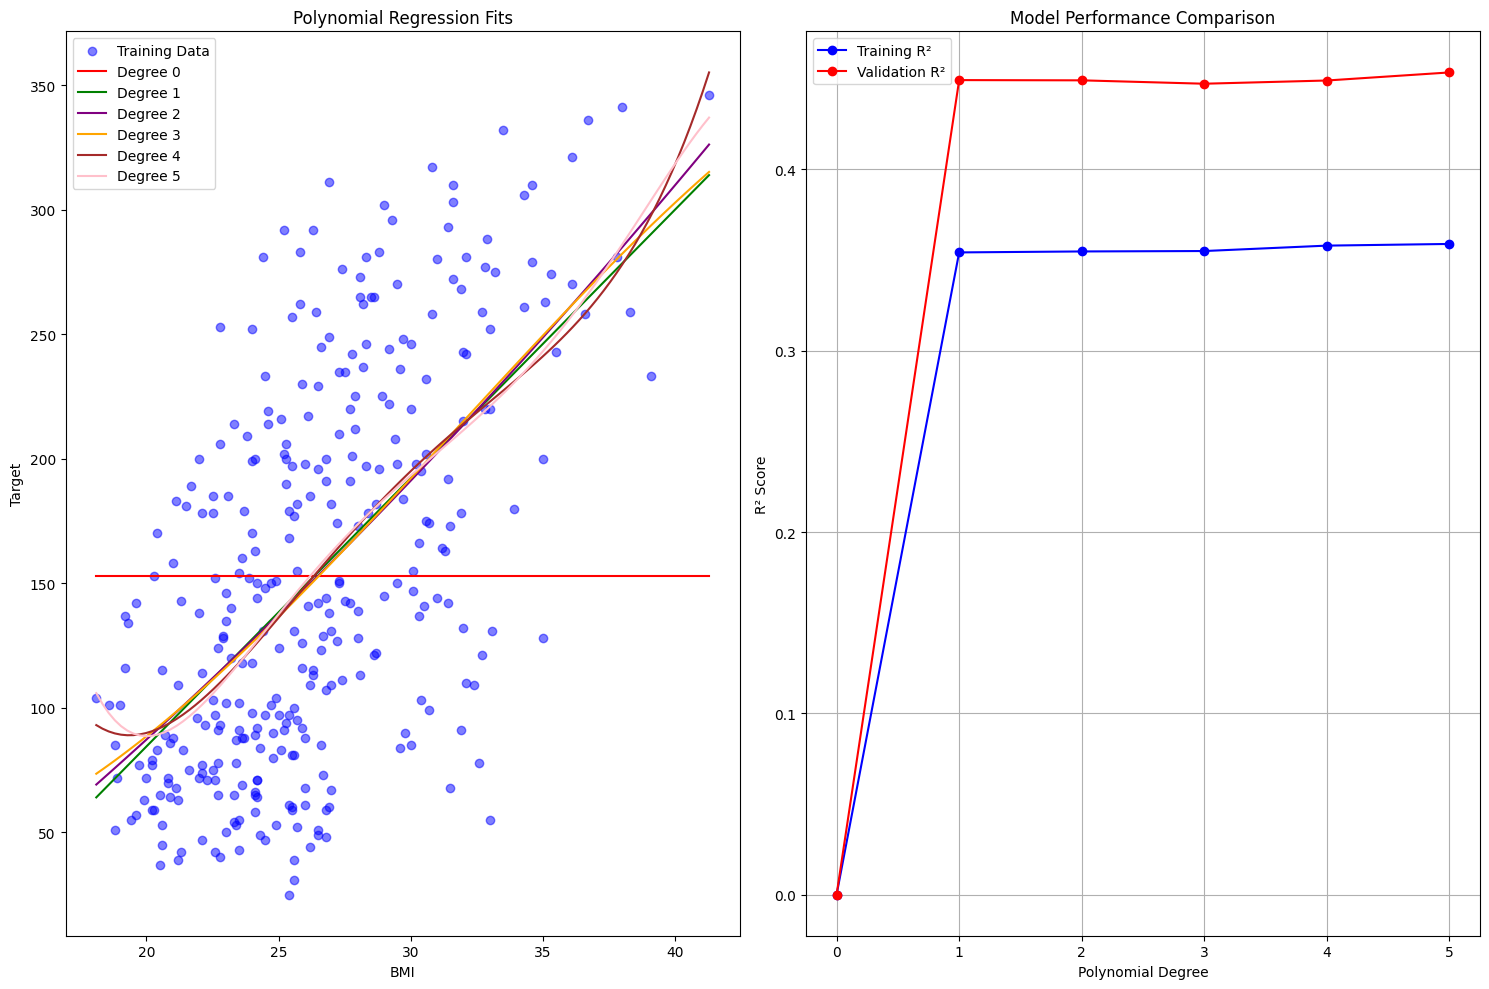

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Extract BMI feature
#print(X_train[['bmi']].values)
X_train_bmi = X_train[['bmi']].values
X_val_bmi = X_val[['bmi']].values

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Dictionary to store models and metrics
models = {}
metrics_data = {
    'Degree': [],
    'Train R²': [], 'Val R²': [],
    'Train MAE': [], 'Val MAE': [],
    'Train MAPE': [], 'Val MAPE': []
}

# Train different polynomial regression models
for degree in range(6):  # 0 to 5 degrees
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train_bmi)
    X_val_poly = poly_features.transform(X_val_bmi)
    
    # Train model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    models[degree] = model
    
    # Make predictions
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)
    
    # Calculate metrics
    metrics_data['Degree'].append(degree)
    
    # R-squared
    metrics_data['Train R²'].append(r2_score(y_train, y_train_pred))
    metrics_data['Val R²'].append(r2_score(y_val, y_val_pred))
    
    # Mean Absolute Error
    metrics_data['Train MAE'].append(mean_absolute_error(y_train, y_train_pred))
    metrics_data['Val MAE'].append(mean_absolute_error(y_val, y_val_pred))
    
    # Mean Absolute Percentage Error
    metrics_data['Train MAPE'].append(mean_absolute_percentage_error(y_train, y_train_pred))
    metrics_data['Val MAPE'].append(mean_absolute_percentage_error(y_val, y_val_pred))

# Create summary table
summary_df = pd.DataFrame(metrics_data)
summary_df = summary_df.round(4)  # Round to 4 decimal places for readability

# Display summary table
print("Summary of Model Performance Metrics:")
print(summary_df.to_string(index=False))

# Plotting
plt.figure(figsize=(15, 10))

# Plot 1: Data points and polynomial fits
plt.subplot(121)
plt.scatter(X_train_bmi, y_train, color='blue', alpha=0.5, label='Training Data')

X_plot = np.linspace(X_train_bmi.min(), X_train_bmi.max(), 100).reshape(-1, 1)
colors = ['red', 'green', 'purple', 'orange', 'brown', 'pink']
for degree in range(6):
    poly_features = PolynomialFeatures(degree=degree)
    X_plot_poly = poly_features.fit_transform(X_plot)
    y_plot = models[degree].predict(X_plot_poly)
    plt.plot(X_plot, y_plot, color=colors[degree], label=f'Degree {degree}')

plt.xlabel('BMI')
plt.ylabel('Target')
plt.title('Polynomial Regression Fits')
plt.legend()

# Plot 2: Metrics comparison
plt.subplot(122)
x = range(6)
plt.plot(x, metrics_data['Train R²'], 'bo-', label='Training R²')
plt.plot(x, metrics_data['Val R²'], 'ro-', label='Validation R²')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
    


## 8. Identify the best model based on the table above.
Best Model Identification:
Based on these metrics, the degree 2 polynomial appears to be the best model because:
Validation metrics are strong:
   - R² = 0.4492
   - MAE = 41.7577
   - MAPE = 40.3099

**Although degree = 3 shows higher R² lower MAE and MAPE, but the improvement on the validation set is not significant. In fact, R² in validation set shows a slight decrease, this may suggest that the degree=3 model is beginning to overfit the training data.**

The degree 2 model provides a good trade-off between model complexity and performance. Higher degree polynomials don't offer substantial improvements and might risk overfitting.

## 9. Run the chosen model on the test set and provide results (R-Squared, MAPE, MAE) (1 point)

Test Set Results for Polynomial Regression (Degree 2):
R-Squared: 0.2002
Mean Absolute Percentage Error (MAPE): 48.7322%
Mean Absolute Error (MAE): 54.9755


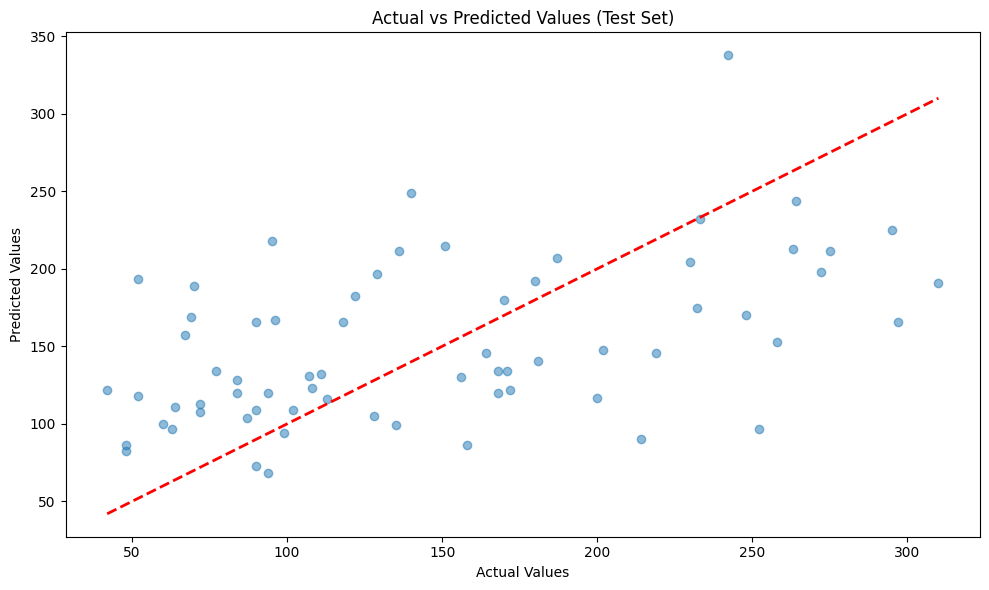

In [6]:
# Extract BMI feature from test set
X_test_bmi = X_test[['bmi']].values

# Create polynomial features (degree 2)
poly_features = PolynomialFeatures(degree=2)
X_test_poly = poly_features.fit_transform(X_test_bmi)

# Get the chosen model (degree 2)
chosen_model = models[2]

# Make predictions on the test set
y_test_pred = chosen_model.predict(X_test_poly)

# Calculate metrics
r2 = r2_score(y_test, y_test_pred)
mape = mean_absolute_percentage_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

# Print results
print("Test Set Results for Polynomial Regression (Degree 2):")
print(f"R-Squared: {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Optional: Create a scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Test Set)")
plt.tight_layout()
plt.show()

## 10.Plot a graph of the train, validation and test data points, and the fit of the chosen model over each of them

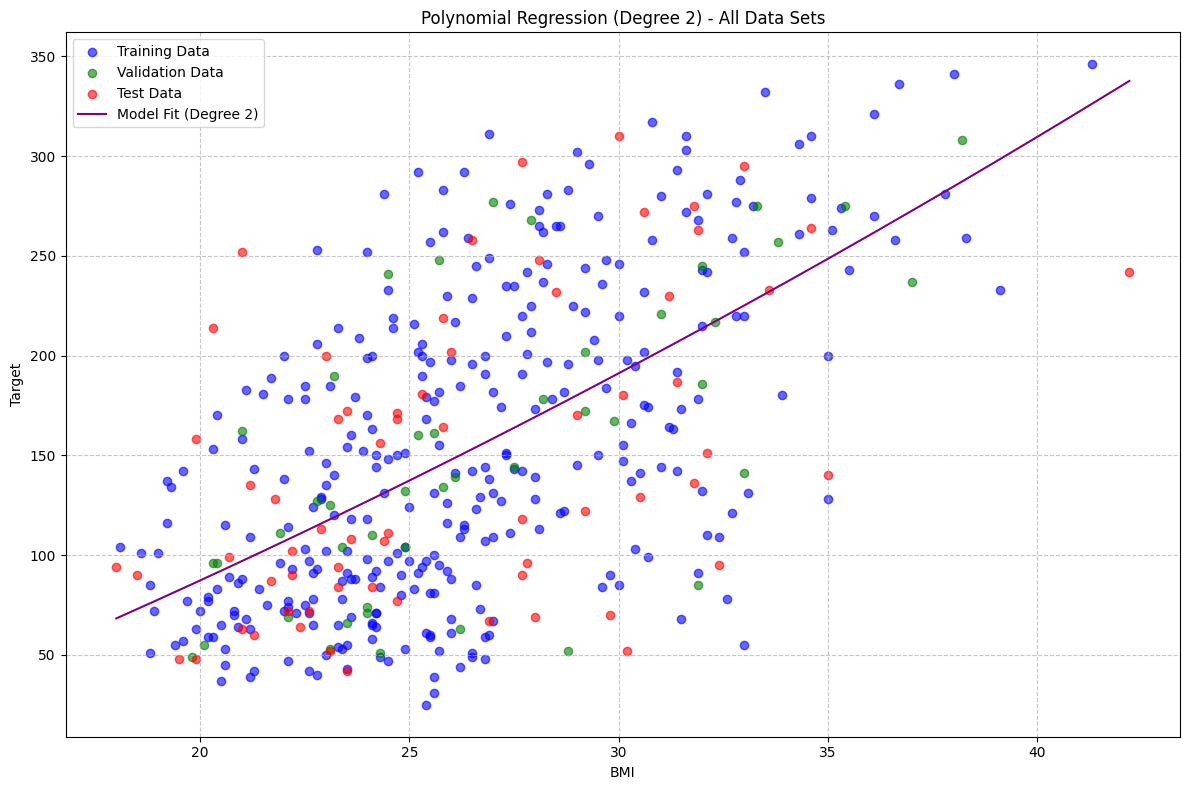

In [7]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

# Combine all data points
X_all = np.vstack((X_train_bmi, X_val_bmi, X_test_bmi))
y_all = np.concatenate((y_train, y_val, y_test))

# Create polynomial features for degree 2
poly_features = PolynomialFeatures(degree=2)
X_all_poly = poly_features.fit_transform(X_all)

# Get the chosen model (degree 2)
chosen_model = models[2]

# Generate points for smooth curve
X_smooth = np.linspace(X_all.min(), X_all.max(), 300).reshape(-1, 1)
X_smooth_poly = poly_features.transform(X_smooth)
y_smooth = chosen_model.predict(X_smooth_poly)

# Plotting
plt.figure(figsize=(12, 8))

# Plot data points
plt.scatter(X_train_bmi, y_train, color='blue', alpha=0.6, label='Training Data')
plt.scatter(X_val_bmi, y_val, color='green', alpha=0.6, label='Validation Data')
plt.scatter(X_test_bmi, y_test, color='red', alpha=0.6, label='Test Data')

# Plot the model fit
plt.plot(X_smooth, y_smooth, color='purple', label='Model Fit (Degree 2)')

plt.xlabel('BMI')
plt.ylabel('Target')
plt.title('Polynomial Regression (Degree 2) - All Data Sets')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## 11. Write down the equation of the best model (with a two decimal digit precision, assuming it's sufficient) (1 point).


In [8]:
# Get the coefficients and intercept
coeffs = chosen_model.coef_
intercept = chosen_model.intercept_

# Print the shape and content of coeffs
print("Shape of coefficients:", coeffs.shape)
print("Coefficients:", coeffs)
print("Intercept:", intercept)

# Determine the degree of the polynomial based on the number of coefficients
degree = len(coeffs) - 1

# Print the equation
print("\nEquation of the best model:")
equation = f"y = "
for i in range(degree, -1, -1):
    if i > 1:
        equation += f"{coeffs[i]:.2f}x^{i} + "
    elif i == 1:
        equation += f"{coeffs[i]:.2f}x + "
    else:
        equation += f"{coeffs[i]:.2f}"
if intercept < 0:
    equation += f" {intercept:.2f}"
else:
    equation += f" + {intercept:.2f}"
print(equation)



Shape of coefficients: (3,)
Coefficients: [0.         6.71740195 0.07335305]
Intercept: -76.42889727529897

Equation of the best model:
y = 0.07x^2 + 6.72x + 0.00 -76.43


## 12. Calculate the expected diabetes progression for a BMI value of your choice using `model.perdict()` for that value (0.5 point).

In [9]:
# Choose a BMI value: 25
bmi_value = 25

# Create polynomial features for this BMI value
X_new = np.array([[bmi_value]])
X_new_poly = poly_features.transform(X_new)
print(X_new)
print(X_new_poly)

# Predict using the model
predicted_progression = chosen_model.predict(X_new_poly)[0]

print(f"\nFor a BMI of {bmi_value}:")
print(f"Predicted diabetes progression: {predicted_progression:.2f}")

[[25]]
[[  1.  25. 625.]]

For a BMI of 25:
Predicted diabetes progression: 137.35


## 13. How many trainable parameters are we fitting for each of the models? Explain these values. One way is to use sklearn function `get_feature_names_out()`(1 point)


In [10]:
# Calculate and print the number of trainable parameters for each model
print("\nNumber of trainable parameters for each model:")
for degree in range(6):  # 0 to 5 degrees
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train_bmi)
    
    # Get feature names
    feature_names = poly_features.get_feature_names_out(['x'])
    
    # Number of features (including intercept)
    num_features = len(feature_names)
    
    # Print results
    print(f"Degree {degree}:")
    print(f"  Features: {feature_names}")
    print(f"  Number of trainable parameters: {num_features}")
    print()


Number of trainable parameters for each model:
Degree 0:
  Features: ['1']
  Number of trainable parameters: 1

Degree 1:
  Features: ['1' 'x']
  Number of trainable parameters: 2

Degree 2:
  Features: ['1' 'x' 'x^2']
  Number of trainable parameters: 3

Degree 3:
  Features: ['1' 'x' 'x^2' 'x^3']
  Number of trainable parameters: 4

Degree 4:
  Features: ['1' 'x' 'x^2' 'x^3' 'x^4']
  Number of trainable parameters: 5

Degree 5:
  Features: ['1' 'x' 'x^2' 'x^3' 'x^4' 'x^5']
  Number of trainable parameters: 6




Degree 0: 1 parameter (only intercept)

Equation: y = b


Degree 1: 2 parameters (slope and intercept)

Equation: y = ax + b


Degree 2: 3 parameters

Equation: y = ax² + bx + c


Degree 3: 4 parameters

Equation: y = ax³ + bx² + cx + d


Degree 4: 5 parameters

Equation: y = ax⁴ + bx³ + cx² + dx + e


Degree 5: 6 parameters

Equation: y = ax⁵ + bx⁴ + cx³ + dx² + ex + f



As the degree increases, the model becomes more complex and can capture more intricate relationships, but it also becomes more prone to overfitting.

When selecting the best model, we need to find a balance between model complexity (number of parameters) and performance. More parameters don't always mean a better model, especially when we consider generalization ability.

This analysis helps us understand why we chose the degree 2 model: it provides enough complexity to capture non-linear relationships in the data while not being overly complex, thus avoiding overfitting. 

## 14. Provide a conclusion section. In particular, do a deep dive on where the model fails, and add a short section in the conclusions that describes the model limitations. This should be in addition to summarizing it performance. (1 point).


### Limitations and Areas of Failure:

1. Overfitting at Extremes:
   - At lower input values (below 20), the model tends to underestimate the target variable.
   - At higher input values (above 35), the model shows a tendency to overestimate, as indicated by the upward curve of the polynomial function.

2. High Variance:
   - There is significant scatter in the data points around the fitted line, suggesting high variance in the target variable that is not fully explained by the input variable alone.
   - This high variance is particularly noticeable in the mid-range of the input variable (25-35), where the spread of target values is largest.

3. Outlier Sensitivity:
   - The model appears to be influenced by outliers, particularly at the upper end of the input range. This could be skewing the polynomial curve upwards at higher input values.



In conclusion, while the polynomial regression model of degree 2 provides a basic fit to the data, it falls short in capturing the full complexity of the relationship between the input and target variables. The high variance of the model suggest that a more sophisticated approach, possibly incorporating additional variables and using more advanced modeling techniques, would be necessary for improved predictive performance.

## Part 3

Based on the correlation, I recommend selecting the following features:

- bmi: Has the highest correlation with the target variable.

- s5: Has the second highest correlation with the target variable, and although it is highly correlated with s4, it has a stronger correlation with the target.

- bp: Has a high correlation with the target variable and is not highly correlated with other features.

- age: Although its correlation with the target is not the highest, age is considered an important risk factor for diabetes in medical terms.

- s6: Has a certain correlation with the target and is not highly correlated with other selected features.

## Run different Models
1. Two polynomial models (degrees >1, of your choice)
2. Two decision trees (e.g. consider changing the `max_depth` hyperparameter)
3. Two kNNs

In [11]:

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load data
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True, as_frame=True, scaled=False)

# Select features
selected_features = ['bmi', 's5', 'bp', 'age', 's6']
X = diabetes_X[selected_features]
y = diabetes_y

# Split the data
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1/0.85, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Create polynomial features (2nd and 3rd degree)
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly_3 = PolynomialFeatures(degree=3, include_bias=False)

X_train_poly_2 = poly_2.fit_transform(X_train_scaled)
X_val_poly_2 = poly_2.transform(X_val_scaled)
X_test_poly_2 = poly_2.transform(X_test_scaled)

X_train_poly_3 = poly_3.fit_transform(X_train_scaled)
X_val_poly_3 = poly_3.transform(X_val_scaled)
X_test_poly_3 = poly_3.transform(X_test_scaled)

# Define MAPE function
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Define evaluation function
def evaluate_model(model, X_train, X_val, y_train, y_val):
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
    val_mape = mean_absolute_percentage_error(y_val, y_val_pred)
    
    return train_r2, val_r2, train_mae, val_mae, train_mape, val_mape

# Train and evaluate models
models = {
    'Poly 2': LinearRegression().fit(X_train_poly_2, y_train),
    'Poly 3': LinearRegression().fit(X_train_poly_3, y_train),
    'DT (max_depth=3)': DecisionTreeRegressor(max_depth=3, random_state=42).fit(X_train_scaled, y_train),
    'DT (max_depth=5)': DecisionTreeRegressor(max_depth=5, random_state=42).fit(X_train_scaled, y_train),
    'kNN (n=3)': KNeighborsRegressor(n_neighbors=3).fit(X_train_scaled, y_train),
    'kNN (n=5)': KNeighborsRegressor(n_neighbors=5).fit(X_train_scaled, y_train)
}

results = {}
for name, model in models.items():
    if name.startswith('Poly 2'):
        results[name] = evaluate_model(model, X_train_poly_2, X_val_poly_2, y_train, y_val)
    elif name.startswith('Poly 3'):
        results[name] = evaluate_model(model, X_train_poly_3, X_val_poly_3, y_train, y_val)
    else:
        results[name] = evaluate_model(model, X_train_scaled, X_val_scaled, y_train, y_val)

# Create summary table
summary_df = pd.DataFrame({
    'Model': results.keys(),
    'Train R²': [r[0] for r in results.values()],
    'Val R²': [r[1] for r in results.values()],
    'Train MAE': [r[2] for r in results.values()],
    'Val MAE': [r[3] for r in results.values()],
    'Train MAPE': [r[4] for r in results.values()],
    'Val MAPE': [r[5] for r in results.values()]
})

# Display summary table
print("Model Performance Metrics Summary:")
print(summary_df.round(4).to_string(index=False))

Model Performance Metrics Summary:
           Model  Train R²  Val R²  Train MAE  Val MAE  Train MAPE  Val MAPE
          Poly 2    0.5147  0.5076    44.9204  42.0177     39.4724   44.0068
          Poly 3    0.5684  0.4083    41.8862  48.0069     37.1419   46.2614
DT (max_depth=3)    0.5302  0.4075    43.6324  42.4471     37.7833   43.8183
DT (max_depth=5)    0.6735  0.2510    34.9831  48.2600     30.4958   47.8821
       kNN (n=3)    0.6651  0.3654    35.8545  48.6148     30.5907   46.8034
       kNN (n=5)    0.6022  0.3782    40.2030  48.5733     34.2244   47.8320


## Conclusion:

The Poly 2 (second-degree polynomial regression) model demonstrates the best overall performance, with the highest validation R² (0.5076) and lowest validation MAE (42.0177). It shows good generalization ability and balance between training and validation metrics. While other models like DT (max_depth=5) and kNN (n=3) perform well on the training set, they exhibit signs of overfitting with poorer validation scores. The Poly 2 model provides the best trade-off between model complexity and predictive accuracy for this dataset, making it the most suitable choice among the evaluated models.